In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
_data = [[1,2,3,0],
    [1,4,5,0],
    [1,11,11,1],
    [1,4,11,1],
    [1,12,5,0],
    [1,5,2,0],
    [1,6,1,0],
    [1,6,3,0],
    [1,2,10,1],
    [1,4,7,1],
    [1,13,8,0],
    [1,1,6,1],
    [1,6,9,1],
    [1,10,12,1],
    [1,8,3,0],
    [1,2,8,1]]
df = pd.DataFrame(np.array(_data), columns=['x0','x1','x2','y'])

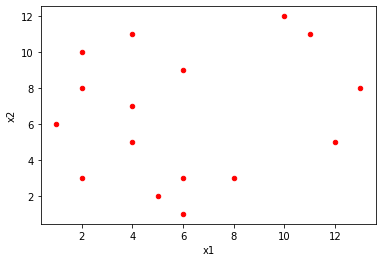

In [3]:
# a scatter plot 
df.plot(kind='scatter',x='x1',y='x2',color='red')
plt.show()

In [4]:
## y = w0 + w1 * X1 + w2 * X2; w0 <- bias, X0 <- 1
## Update rule
## w = w + n * (t-o)x

In [5]:
# w0, w1, w2
# weights  = [0.5,.25,.25]
weights  = [0,0,0]
learning = 0.001

In [6]:
datadf = df.drop('y', axis=1)
data   = datadf.to_numpy()
target = df['y']

In [7]:
n       = learning
numIter = 100
iter_wt = weights
iters = []

for iter in range(1,numIter):
    _wt = iter_wt
    for sampleIndex in range(0,len(data)):
        dot = data[sampleIndex].dot(_wt)
        output = 0
        # Apply threshold
        if dot > 0:
            output = 1
        featureIndex = 0
        # adjust weights
        new_wt = [0,0,0]
        for w in _wt:
            x = data[sampleIndex][featureIndex]
            new_wt[featureIndex] = w + n * (target[sampleIndex] - output) * x
            featureIndex = featureIndex + 1
        # Update weights all at once
        _wt = new_wt
    # First fold
    iter_wt = _wt
    iters.append(iter_wt)

In [8]:
def plot_data(inputs,targets,weights):
    plt.figure(figsize=(10,6))
    plt.grid(True)

    for input,target in zip(inputs,targets):
        plt.plot(input[0],input[1],'ro' if (target == 1.0) else 'bo')

    for i in np.linspace(np.amin(inputs[:,:1]),np.amax(inputs[:,:1])):
        slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
        intercept = -weights[0]/weights[2]

        #y =mx+c, m is slope and c is intercept
        y = (slope*i) + intercept
        plt.plot(i, y,'ko')

In [9]:
inputs = df.drop(['x0','y'], axis=1).to_numpy()
targets = target

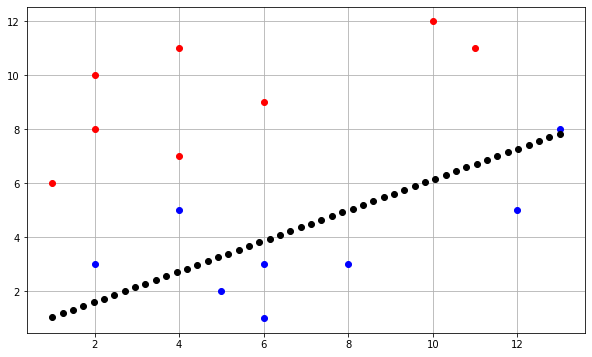

In [10]:
plot_data(inputs,targets,iters[13])

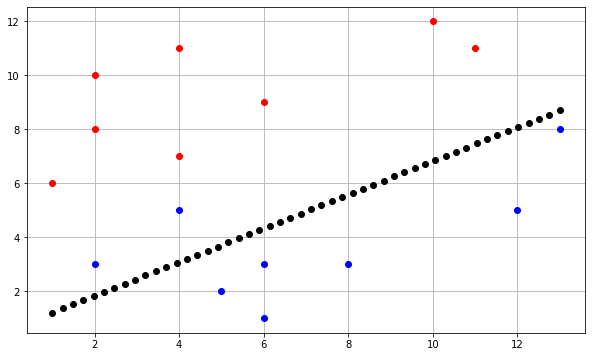

In [11]:
plot_data(inputs,targets,iters[19])

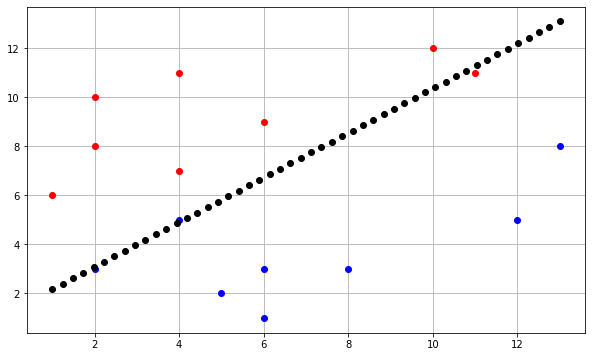

In [12]:
plot_data(inputs,targets,iters[49])

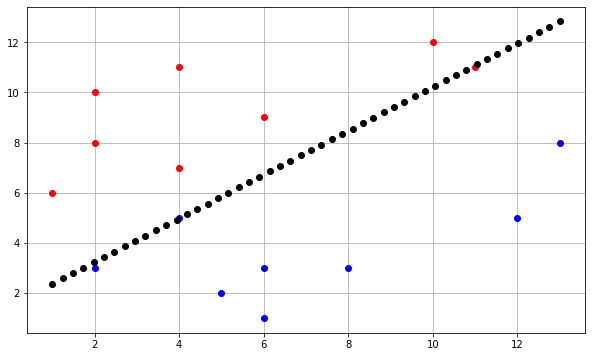

In [13]:
plot_data(inputs,targets,iters[62])

In [14]:
print("Weights = ", iters[62])
print("Num Iterations = ", 62)

Weights =  [-0.07000000000000005, -0.041000000000000106, 0.04699999999999999]
Num Iterations =  62


# Perceptron schematic

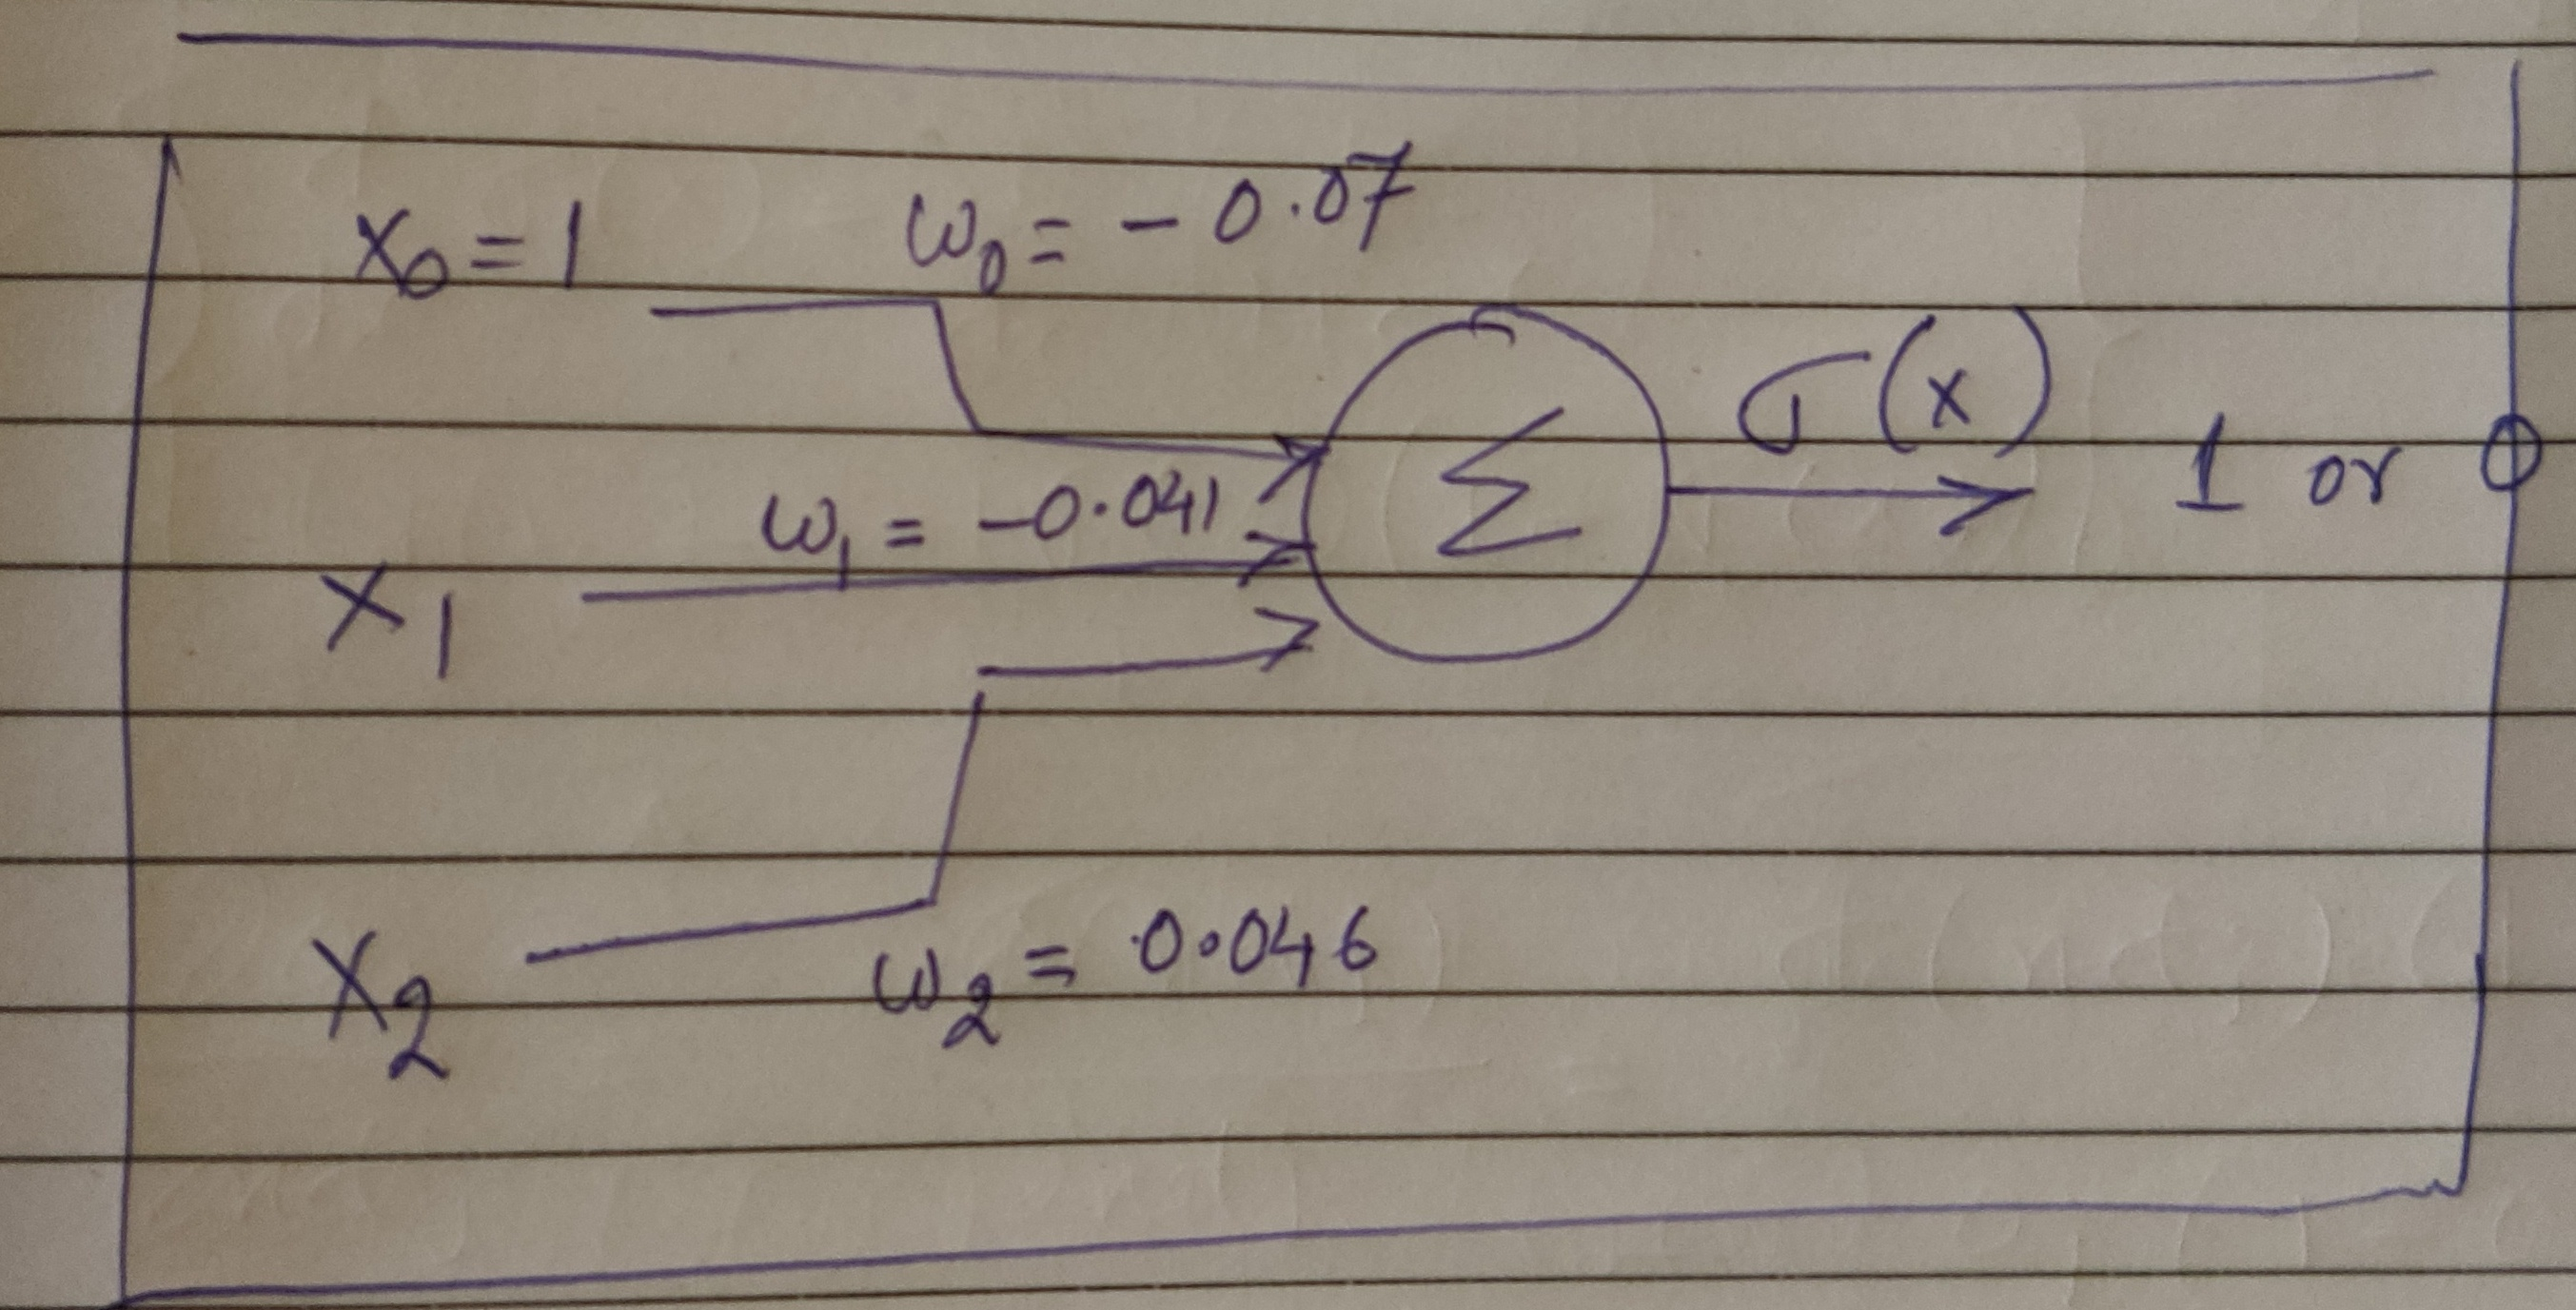